In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [19]:
df = pd.read_csv("D:\\Ameng\\Data Science Project\\breast-cancer-prediciton\\data\\raw\\breast_cancer.csv")

In [20]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

M -> Maligint  
B -> Benign

In [22]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val=='M' else 0)

## EDA

### Target Variable Analysis

Shows how many samples are Benign (0) vs Malignant (1) and checks if dataset is balanced or imbalanced

Diagnosis distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64

Percentages:
diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64


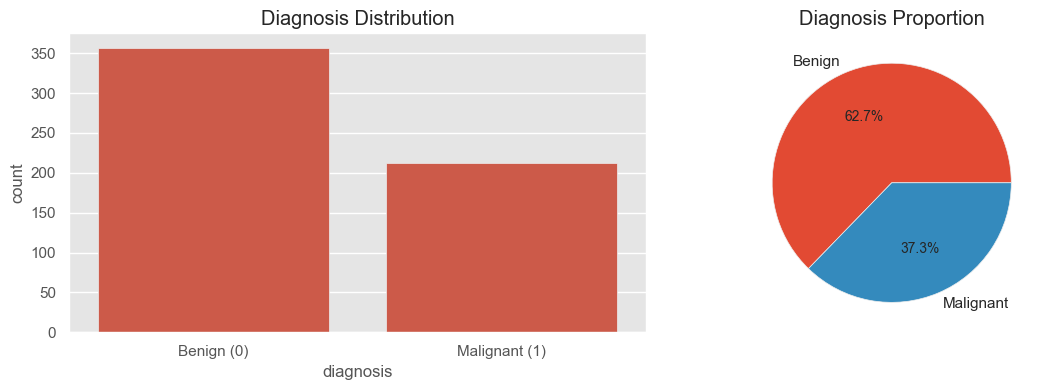

In [25]:
### Target Variable Analysis
print("Diagnosis distribution:")
print(df['diagnosis'].value_counts())
print("\nPercentages:")
print(df['diagnosis'].value_counts(normalize=True) * 100)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x='diagnosis', ax=axes[0])
axes[0].set_title('Diagnosis Distribution')
axes[0].set_xticklabels(['Benign (0)', 'Malignant (1)'])

df['diagnosis'].value_counts().plot(kind='pie', 
                                     labels=['Benign', 'Malignant'],
                                     autopct='%1.1f%%',
                                     ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Diagnosis Proportion')

plt.tight_layout()
plt.show()

### Distribution Plot

Shows the shape/distribution of each feature.

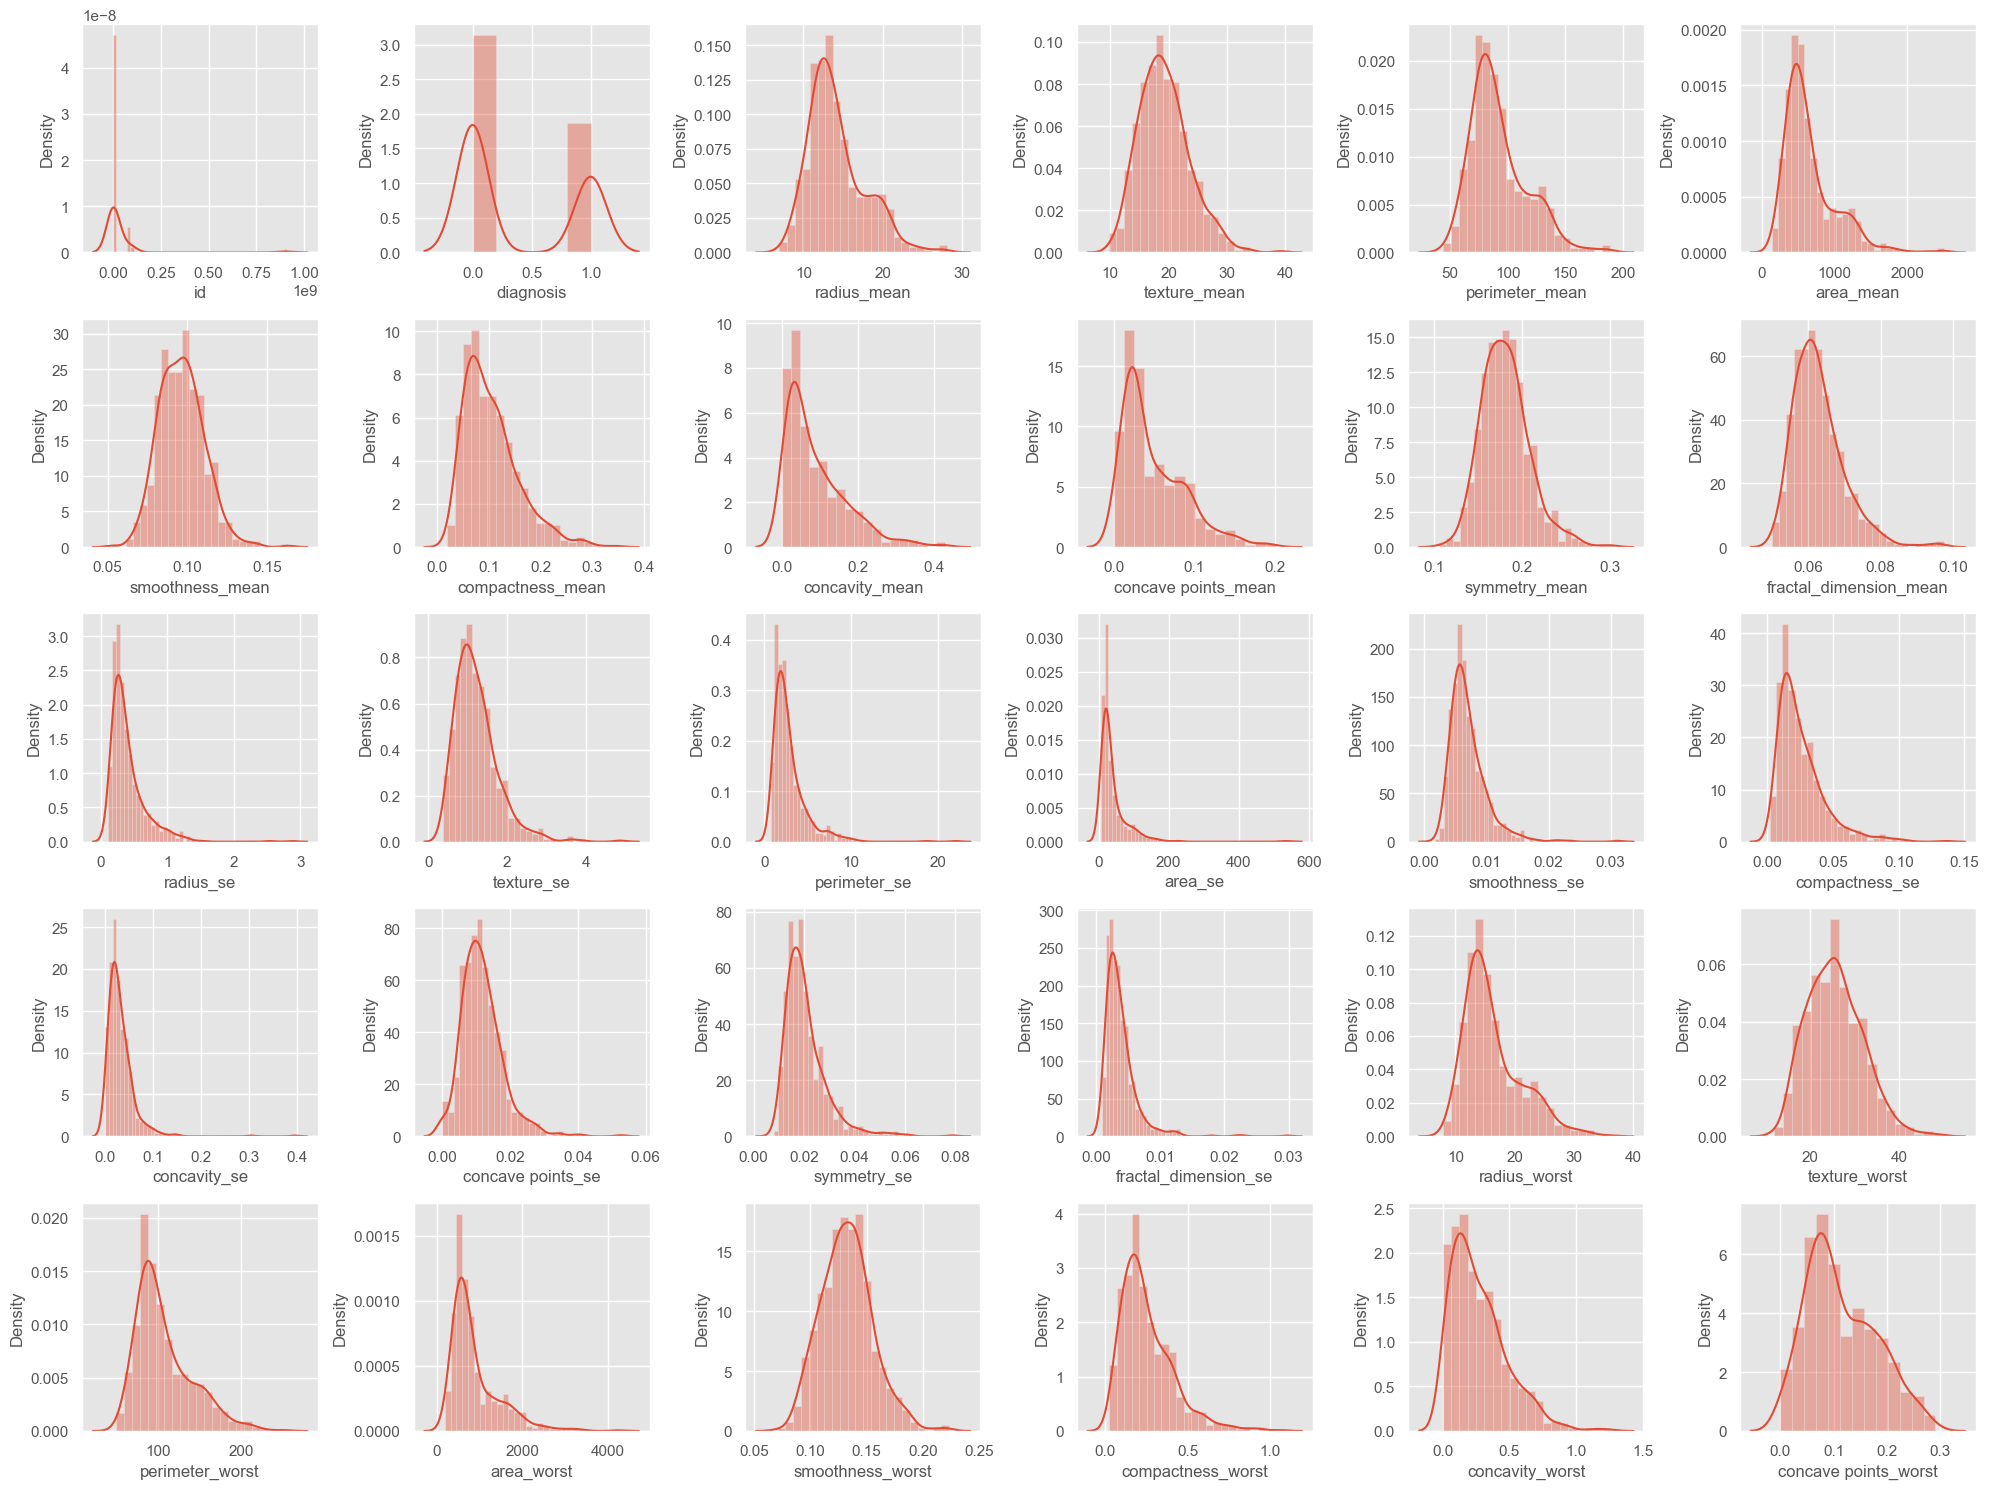

In [26]:
plt.figure(figsize=(20,15))
plotnumber= 1
for column in df:
    if plotnumber <= 30:
        plt.subplot(5,6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [34]:
print("="*60)
print("SKEWNESS ANALYSIS")
print("="*60)

# Calculate skewness
skewness_data = {}
for col in df.columns:
    if col != 'diagnosis':
        skew_value = skew(df[col])
        skewness_data[col] = skew_value

skewness_df = pd.DataFrame.from_dict(skewness_data, orient='index', columns=['Skewness'])
skewness_df['Abs_Skewness'] = abs(skewness_df['Skewness'])
skewness_df = skewness_df.sort_values('Abs_Skewness', ascending=False)

print("\nTop 10 most skewed features:")
print(skewness_df.head(10))

highly_skewed = skewness_df[skewness_df['Abs_Skewness'] > 1].index.tolist()
print(f"\nHighly skewed features (|skew| > 1): {len(highly_skewed)}")


SKEWNESS ANALYSIS

Top 10 most skewed features:
                         Skewness  Abs_Skewness
id                       6.456673      6.456673
area_se                  5.432816      5.432816
concavity_se             5.096981      5.096981
fractal_dimension_se     3.913617      3.913617
smoothness_se            2.308344      2.308344
symmetry_se              2.189342      2.189342
compactness_se           1.897202      1.897202
area_worst               1.854468      1.854468
fractal_dimension_worst  1.658193      1.658193
texture_se               1.642100      1.642100

Highly skewed features (|skew| > 1): 17


### Correlation with Target

Measures linear relationship between each feature and diagnosis (-1 to +1)

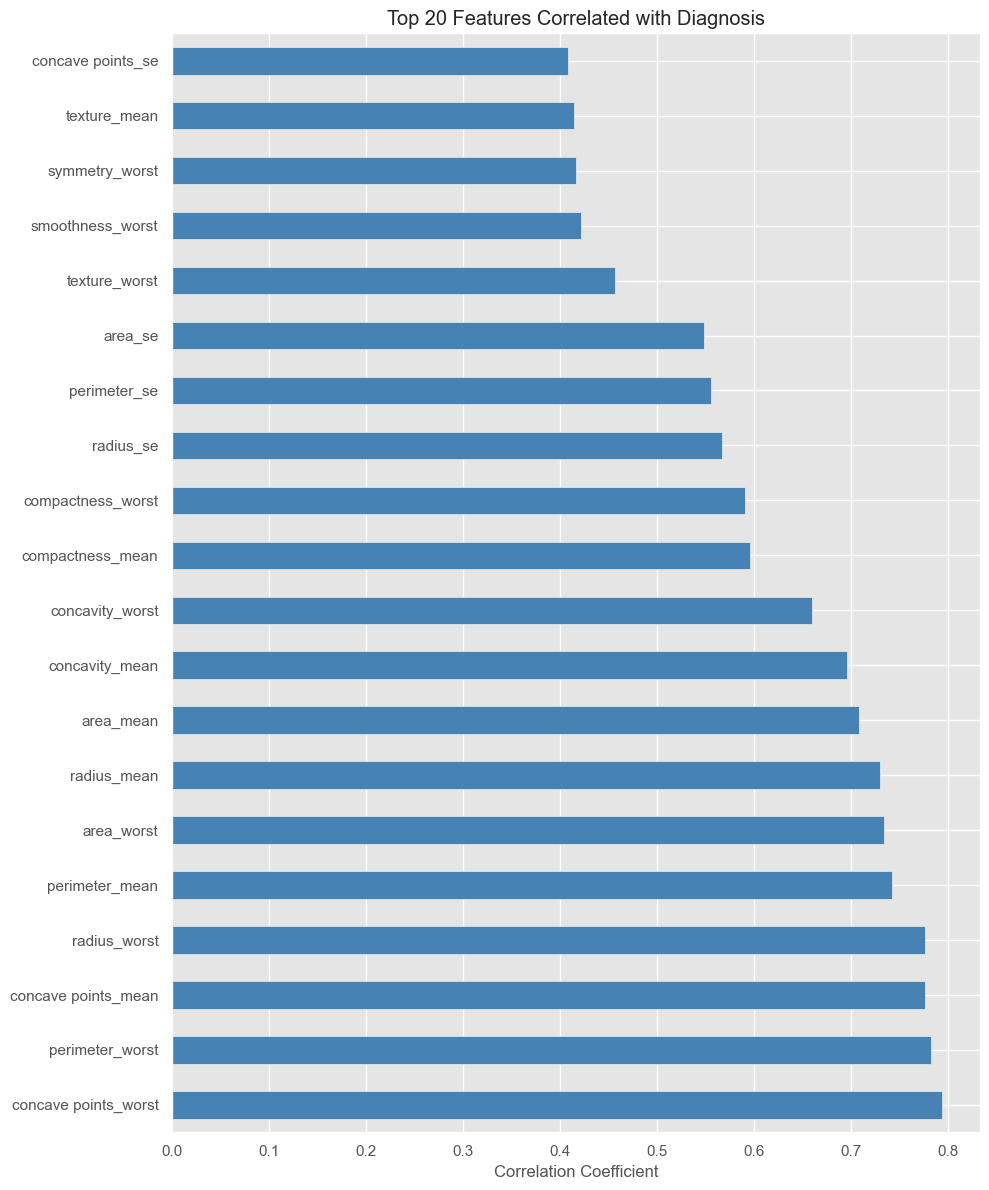


Top 10 positively correlated features:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64

Top 10 negatively correlated features:
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0.039769
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis, dtype: float64


In [28]:
### Correlation with Diagnosis
correlation_with_target = df.corr()['diagnosis'].sort_values(ascending=False)

# Visualize top correlations
plt.figure(figsize=(10, 12))
correlation_with_target[1:21].plot(kind='barh', color='steelblue')  # Top 20
plt.title('Top 20 Features Correlated with Diagnosis')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='red', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

print("\nTop 10 positively correlated features:")
print(correlation_with_target[1:11])
print("\nTop 10 negatively correlated features:")
print(correlation_with_target[-10:])

### Box Plots by Diagnosis

Compares feature distribution between Benign (0) and Malignant (1) groups. Box shows median, quartiles; whiskers show range; dots are outliers

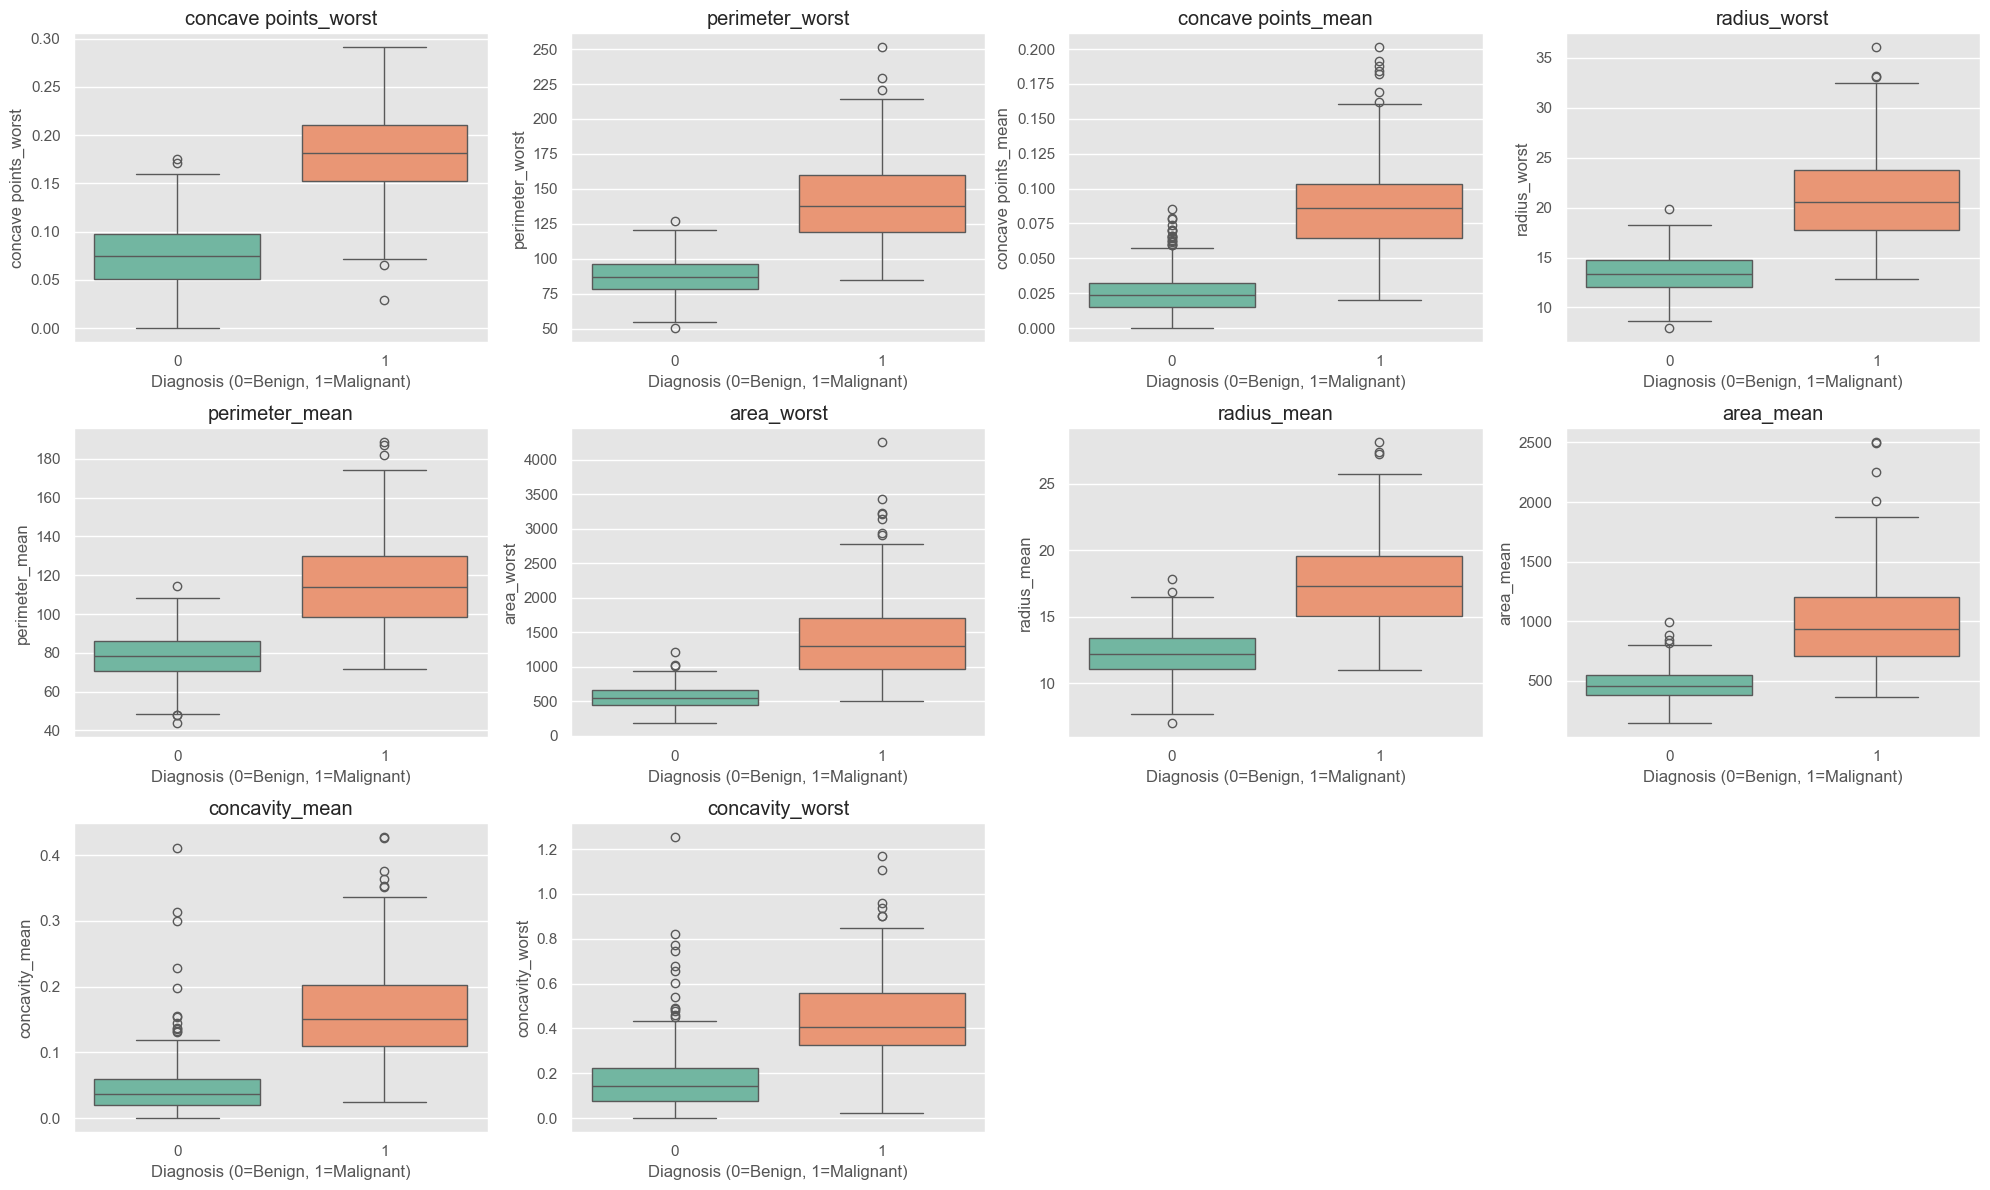

In [29]:
### Box plots for top correlated features
# Select top correlated features
top_features = correlation_with_target[1:11].index.tolist()  # Top 10

plt.figure(figsize=(20, 12))
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x='diagnosis', y=feature, palette='Set2')
    plt.title(f'{feature}')
    plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
    
plt.tight_layout()
plt.show()

### Correlation Heatmap

Shows correlation between ALL pairs of features. Red/warm = positive correlation, Blue/cool = negative correlation

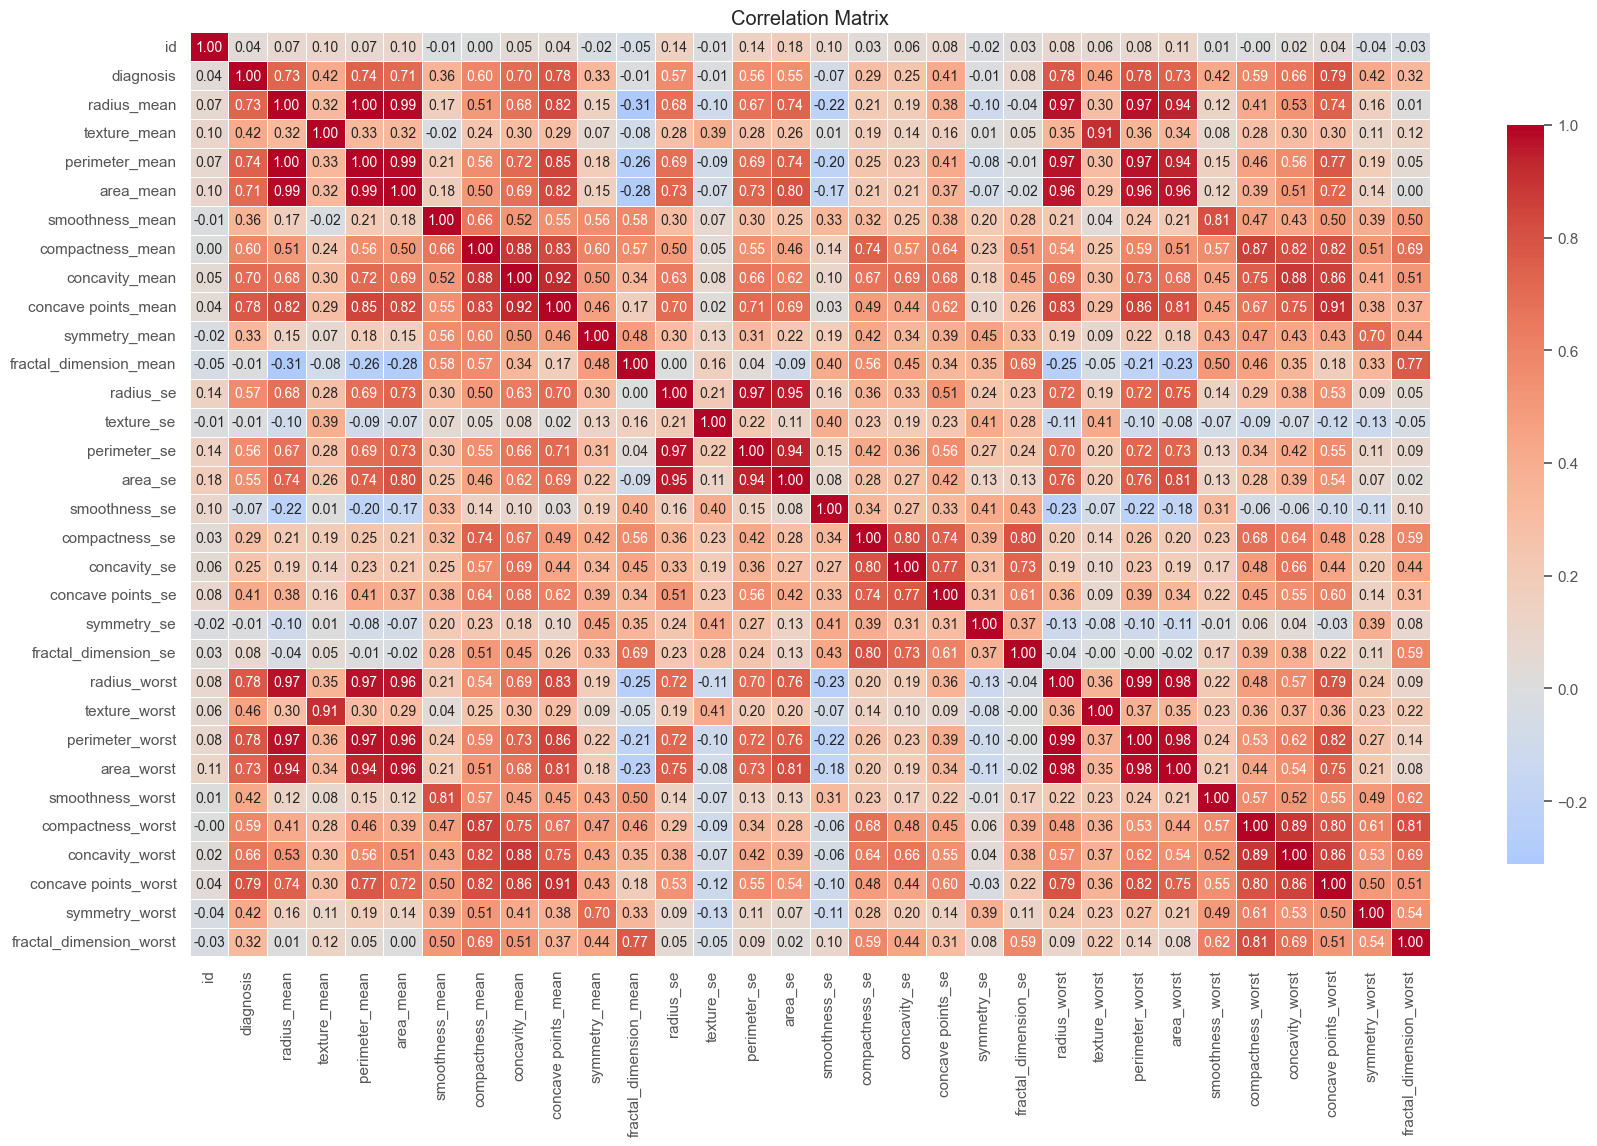

In [30]:
plt.figure(figsize=(20,12))
corr = df.corr()
sns.heatmap(corr,
            cmap='coolwarm',     # built-in diverging colormap
            annot=True,          # show correlation numbers
            fmt=".2f",
            center=0,            # puts white/neutral at 0
            linewidths=0.5,
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

### Multicollinearity Detection & Removal

Finds pairs of features with correlation > 0.92. Automatically drops one feature from each pair

In [31]:
### Multicollinearity Detection and Removal
print("Original shape:", df.shape)

corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

print(f"\nFeatures to drop due to high correlation (>0.92): {len(to_drop)}")
print(to_drop)

# Show what each dropped feature was correlated with
for col in to_drop:
    correlated_with = tri_df[col][tri_df[col] > 0.92].index.tolist()
    correlations = tri_df[col][tri_df[col] > 0.92].values
    print(f"\n'{col}' correlated with:")
    for feat, corr_val in zip(correlated_with, correlations):
        print(f"  - {feat}: {corr_val:.3f}")

df = df.drop(to_drop, axis=1)
print(f"\nFinal shape after removing multicollinearity: {df.shape}")

Original shape: (569, 32)

Features to drop due to high correlation (>0.92): 8
['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst']

'radius_mean' correlated with:
  - perimeter_mean: 0.998
  - area_mean: 0.987
  - radius_worst: 0.970
  - perimeter_worst: 0.965
  - area_worst: 0.941

'perimeter_mean' correlated with:
  - area_mean: 0.987
  - radius_worst: 0.969
  - perimeter_worst: 0.970
  - area_worst: 0.942

'area_mean' correlated with:
  - radius_worst: 0.963
  - perimeter_worst: 0.959
  - area_worst: 0.959

'concavity_mean' correlated with:
  - concave points_mean: 0.921

'radius_se' correlated with:
  - perimeter_se: 0.973
  - area_se: 0.952

'perimeter_se' correlated with:
  - area_se: 0.938

'radius_worst' correlated with:
  - perimeter_worst: 0.994
  - area_worst: 0.984

'perimeter_worst' correlated with:
  - area_worst: 0.978

Final shape after removing multicollinearity: (569, 24)


### Statistical Significance Testing (T-tests)

Tests if feature values are statistically different between Benign and Malignant groups. p-value < 0.05 means "difference is real, not due to random chance"

In [32]:
### Statistical Significance Testing
print("Statistical Tests (T-test p-values):")
print("="*60)

significant_features = []
p_values = {}

for col in df.columns:
    if col != 'diagnosis':
        benign = df[df['diagnosis'] == 0][col]
        malignant = df[df['diagnosis'] == 1][col]
        t_stat, p_value = ttest_ind(benign, malignant)
        p_values[col] = p_value
        
        if p_value < 0.05:
            significant_features.append(col)
            print(f"{col:35} p-value: {p_value:.2e} *** Significant")
        else:
            print(f"{col:35} p-value: {p_value:.2e}")

print(f"\n✓ Significant features (p < 0.05): {len(significant_features)} out of {len(df.columns)-1}")

Statistical Tests (T-test p-values):
id                                  p-value: 3.44e-01
texture_mean                        p-value: 4.06e-25 *** Significant
smoothness_mean                     p-value: 1.05e-18 *** Significant
compactness_mean                    p-value: 3.94e-56 *** Significant
concave points_mean                 p-value: 7.10e-116 *** Significant
symmetry_mean                       p-value: 5.73e-16 *** Significant
fractal_dimension_mean              p-value: 7.60e-01
texture_se                          p-value: 8.43e-01
area_se                             p-value: 5.90e-46 *** Significant
smoothness_se                       p-value: 1.10e-01
compactness_se                      p-value: 9.98e-13 *** Significant
concavity_se                        p-value: 8.26e-10 *** Significant
concave points_se                   p-value: 3.07e-24 *** Significant
symmetry_se                         p-value: 8.77e-01
fractal_dimension_se                p-value: 6.31e-02
texture_

### Save Dataset

In [33]:
df.to_csv("D:\\Ameng\\Data Science Project\\breast-cancer-prediciton\\data\\processed\\removed_multicollinearity.csv", index=False)